# Assignment 1


```
- Fundamentals of Robot Control, Innopolis University (Fall semester 2021)
- Name : Ivan Efremov
- Email : i.efremov@innopolis.university
```
<hr>


## Problem 1

![](Problem1.png)

\begin{equation}
    z^{(4)} = - 2z + 3\ddot{z} 
\end{equation}

\begin{equation}
    \begin{bmatrix}
        \dot{z}\\ \ddot{z} \\ z^{(3)} \\ z^{(4)}
    \end{bmatrix} =
    \begin{bmatrix}
         0 & 1 & 0 & 0 \\
         0 & 0 & 1 & 0 \\
         0 & 0 & 0 & 1 \\
         -2 & 0 & 3 & 0 
    \end{bmatrix}
    \begin{bmatrix}
        z\\ \dot{z} \\ \ddot{z} \\ z^{(3)}
    \end{bmatrix}
\end{equation}

## Problem 2

![](Problem2.png)

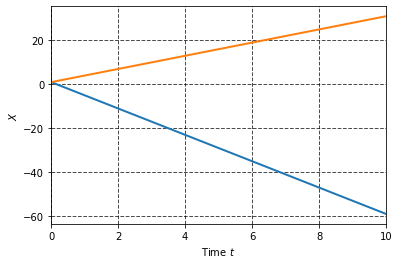

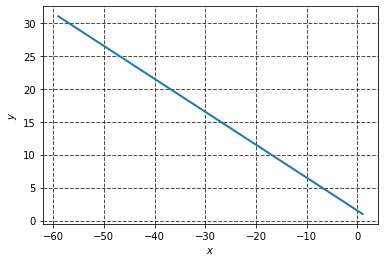

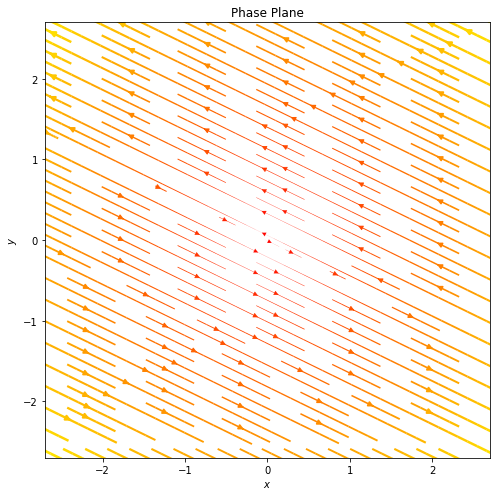

In [1]:
import numpy as np
from scipy.integrate import odeint # import integrator routine
from matplotlib.pyplot import *

def f(X, t):
    x, y = X[0], X[1]
    dx = -2*x - 4*y
    dy = x + 2*y
    return dx, dy

t0 = 0 # Initial time 
tf = 10 # Final time
t = np.linspace(t0, tf, 1000)

X0 = 1, 1  # initial state

solution = odeint(f, X0, t)
x, y = solution[:,0], solution[:,1]
plot(t, solution, linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'${X}$')
xlabel(r'Time $t$')
show()

plot(x, y, linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlabel(r'${x}$')
ylabel(r'${y}$')
show()

x_e_max, y_e_max = 3, 3
x_e_span = np.arange(-x_e_max,x_e_max,0.1)
y_e_span = np.arange(-y_e_max,y_e_max,0.1)
x_e_grid, y_e_grid = np.meshgrid(x_e_span, y_e_span)

figure(figsize=(7, 7))
title('Phase Plane')

L = (x_e_grid**2 + y_e_grid**2)**0.5
lw = 3*L / L.max()
dx, dy = f([x_e_grid, y_e_grid],t)
strm = streamplot(x_e_span, y_e_span, dx, dy, density = 1.5,color=L, cmap='autumn', linewidth = lw)
xlim([-0.9*x_e_max,0.9*x_e_max])
ylim([-0.9*y_e_max,0.9*y_e_max])
xlabel(r'${x}$')
ylabel(r'${y}$')
tight_layout()
show()

## Problem 3

![](Problem3.png)

\begin{equation}
    \begin{bmatrix}
        \dot{x}\\
        \dot{y}
    \end{bmatrix} =
    \begin{bmatrix}
        -1 & 2 \\
        -2 & -1
    \end{bmatrix}
    \begin{bmatrix}
        x\\
        y
    \end{bmatrix}
\end{equation}

Let's find eigenvalues

\begin{equation}
det
    \begin{vmatrix}
        -1 - \lambda & 2 \\
        -2 & -1 - \lambda
    \end{vmatrix} = 0  
\end{equation} 

$$ \lambda_{1,2} = \frac{-2 \pm \sqrt{-16}}{2} $$  
So real part of eigenvalues is negative, so system is **stable**

## Problem 4

![](Problem4.png)

**a.** To find equilibrium point we assume that $ \dot{x}_{1} = 0,  \dot{x}_{2} = 0$
$$ \begin{cases}
    \begin{aligned}
        &x_{1}\left(x_{1}^{2}+x_{2}^{2}-2\right)-4 x_{1} x_{2}^{2}=0 \\
        &4 x_{1}^{2} x_{2}+x_{2}\left(x_{1}^{2}+x_{2}^{2}-2\right)=0
    \end{aligned}
\end{cases} 
$$ 

![](Pr4_1.jpg)

x2 has imaginary part, so it's not suitable for us.  
Let's check $x_1 = 0$ and $x_2 = 0$

![](Pr4_2.jpg)

**b.**

![](Pr4_3.jpg)

So the system is **stable** in region $(x_{1}^{2}, x_{2}^{2}) < 1$

## Problem 5

![](Problem5.png)

We are going to use PD control with nonlinearities cancelation.  
So our control would be:
$$ u_r = -mr\dot{\theta}^2 + \frac{GMm}{r^2} - K_{p_r}(r - r_d) - K_{d_r}\dot{r} $$


$$ u_{\theta} = 2m\dot{r}\dot{\theta} - rK_{p_{\theta}}\theta - rK_{d_{\theta}}(\dot{\theta} - \dot{\theta_d}) $$

In [2]:
re =	6371e+3 # radius of the earth 
r_d = re + 35e6 # desired orbit

m = 200 # mass of satillite
G = 6.67408e-11 # gravitational constant
M = 5.972e+24 # mass of earth
k = G*M

In [3]:
import numpy as np
from scipy.integrate import odeint

def sys_ode(x, t, control, controler_params):
    r, dr, theta, dtheta = x
    
    # Control
    u_r, u_theta = control(x, controler_params) 
    
    ddr = (u_r + m * r * dtheta**2 - G*M*m/r**2) / m
    ddtheta = (u_theta - 2 * m * dr * dtheta) / (m * r)
    return dr, ddr, dtheta, ddtheta

def control(x, controler_params):
    r, dr, theta, dtheta = x
    
    r_d = controler_params['r_d'] 
    dtheta_d = controler_params['dtheta_d'] 
    kp_r = controler_params['kp_r']
    kd_r = controler_params['kd_r']
    kp_theta = controler_params['kp_theta']
    kd_theta = controler_params['kd_theta']

    u_r = -m * r * dtheta**2 + G*M*m/r**2 - kp_r * (r - r_d) - kd_r * dr
    u_theta = 2 * m * dr * dtheta - r * kp_theta * theta - r * kd_theta * (dtheta - dtheta_d)
    
    return u_r, u_theta
  
tf = 5000 # Final time
N = 1000 # Numbers of points in time span
t = np.linspace(0, tf, N) # Create time span

x0 = [re, 0, 0, 0] # Set initial state 

controler_params = {}
controler_params['r_d'] = r_d
controler_params['dtheta_d'] = np.sqrt(k/r_d**3)
controler_params['kp_r'] = 0.005
controler_params['kd_r'] = 4
controler_params['kp_theta'] = 0.005
controler_params['kd_theta'] = 4


sol = odeint(sys_ode, x0, t, args=(control, controler_params,))
r, dr, theta, dtheta = sol[:,0], sol[:,1], sol[:,2], sol[:,3]

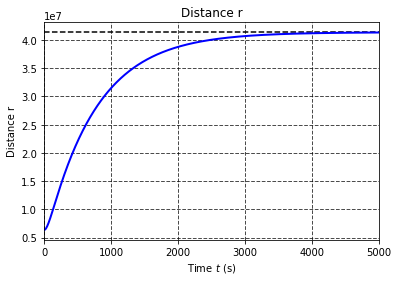

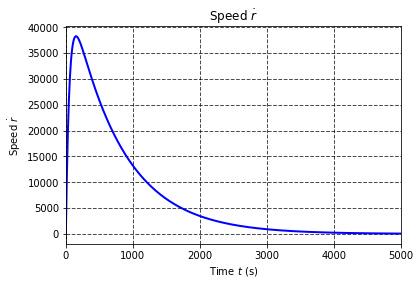

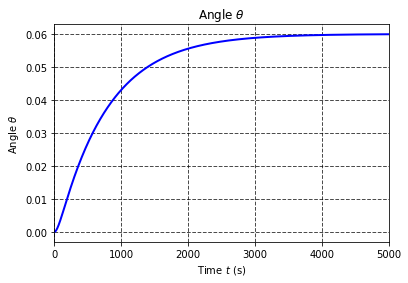

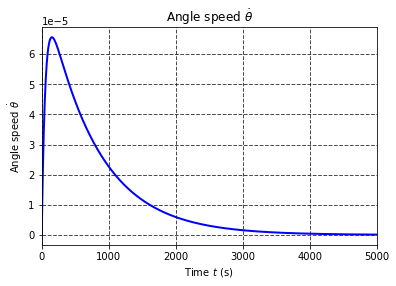

In [4]:
from matplotlib.pyplot import plot, hlines, grid, xlim, xlabel, ylabel, show, title

plot(t, r, 'b', linewidth=2.0)
hlines(controler_params['r_d'], 0, tf,color = 'black', linestyle = '--')
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
ylabel(r'Distance r')
xlabel(r'Time $t$ (s)')
title(r'Distance r')
show()

plot(t, dr, 'b', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
ylabel(r'Speed $\dot{r}$')
xlabel(r'Time $t$ (s)')
title(r'Speed $\dot{r}$')
show()

plot(t, theta, 'b', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
ylabel(r'Angle ${\theta}$')
xlabel(r'Time $t$ (s)')
title(r'Angle ${\theta}$')
show()

plot(t, dtheta, 'b', linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
ylabel(r'Angle speed $\dot{\theta}$')
xlabel(r'Time $t$ (s)')
title(r'Angle speed $\dot{\theta}$')
show()